# Rossmann Store Sales — Phase 5 




------------------------------------------------------------------------

> **How to use**
>
> 1.  Run each cell sequentially. Do not skip cells. Output and models
>     are saved to `/kaggle/working/models_phase5`.
> 2.  If you run on Kaggle, the competition dataset path is
>     `/kaggle/input/competitions/rossmann-store-sales/`.
> 3.  If you run locally, change `DATA_BASE` constant to point to your
>     `dataset/` folder.

------------------------------------------------------------------------

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
base_path = "/kaggle/input/competitions/rossmann-store-sales/"

# Load datasets 
train = pd.read_csv(f'{base_path}train.csv', parse_dates=['Date'], low_memory=False)
store = pd.read_csv(f'{base_path}store.csv')
test = pd.read_csv(f'{base_path}test.csv')

df = pd.merge(train, store, on='Store', how='left')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

## T

In [107]:

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)

df['StateHoliday'] = df['StateHoliday'].map({'0': 0, 0: 0, 'a': 1, 'b': 1, 'c': 1})
df['SchoolHoliday'] = df['SchoolHoliday'].astype(int)

df = df.sort_values(['Store', 'Date'])
df['SalesMovingAverage7'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7).mean())
df['SalesMovingAverage30'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=30).mean())

df['SalesMovingAverage7'] = df['SalesMovingAverage7'].fillna(0)
df['SalesMovingAverage30'] = df['SalesMovingAverage30'].fillna(0)

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,SalesMovingAverage7,SalesMovingAverage30
1016095,1,1,2013-01-01,0,0,0,0,1,1,c,...,0,NaN,NaN,NaN,2013,1,1,1,0.0,0.0
1014980,1,2,2013-01-02,5530,668,1,0,0,1,c,...,0,NaN,NaN,NaN,2013,1,2,1,0.0,0.0
1013865,1,3,2013-01-03,4327,578,1,0,0,1,c,...,0,NaN,NaN,NaN,2013,1,3,1,0.0,0.0
1012750,1,4,2013-01-04,4486,619,1,0,0,1,c,...,0,NaN,NaN,NaN,2013,1,4,1,0.0,0.0
1011635,1,5,2013-01-05,4997,635,1,0,0,1,c,...,0,NaN,NaN,NaN,2013,1,5,1,0.0,0.0


In [108]:
df = df.sort_values(['Store', 'Date'])

df['Sales_Lag1'] = df.groupby('Store')['Sales'].shift(1)

df['Sales_Mean7'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7).mean())

df['Sales_Std7'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7).std())

df['Sales_Lag1'] = df['Sales_Lag1'].fillna(0)
df['Sales_Mean7'] = df['Sales_Mean7'].fillna(0)
df['Sales_Std7'] = df['Sales_Std7'].fillna(0)

df[['Store', 'Date', 'Sales', 'Sales_Lag1', 'Sales_Mean7', 'Sales_Std7']].head(10)

,Store,Date,Sales,Sales_Lag1,Sales_Mean7,Sales_Std7
1016095,1,2013-01-01,0,0.0,0.000000,0.000000
1014980,1,2013-01-02,5530,0.0,0.000000,0.000000
1013865,1,2013-01-03,4327,5530.0,0.000000,0.000000
1012750,1,2013-01-04,4486,4327.0,0.000000,0.000000
1011635,1,2013-01-05,4997,4486.0,0.000000,0.000000
1010520,1,2013-01-06,0,4997.0,0.000000,0.000000
1009405,1,2013-01-07,7176,0.0,3788.000000,2752.283961
1008290,1,2013-01-08,5580,7176.0,4585.142857,2231.018633
1007175,1,2013-01-09,5471,5580.0,4576.714286,2226.961885
1006060,1,2013-01-10,4892,5471.0,4657.428571,2226.641706


In [109]:
import numpy as np

df = df.sort_values(['Store', 'Date'])

df['Sales_Lag1'] = df.groupby('Store')['Sales'].shift(1)
df['Sales_Mean7'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7).mean())
df['Sales_Std7'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7).std())

df['sin_month'] = np.sin(2 * np.pi * df['Month'] / 12)
df['cos_month'] = np.cos(2 * np.pi * df['Month'] / 12)

df['IsHolidayNextDay'] = df['StateHoliday'].shift(-1).fillna(0).astype(int)
df['IsHolidayYesterday'] = df['StateHoliday'].shift(1).fillna(0).astype(int)

df['Sales_Lag1'] = df['Sales_Lag1'].fillna(0)
df['Sales_Mean7'] = df['Sales_Mean7'].fillna(0)
df['Sales_Std7'] = df['Sales_Std7'].fillna(0)

df[['Store', 'Date', 'Sales', 'Sales_Lag1', 'Sales_Mean7', 'Sales_Std7', 'sin_month', 'cos_month', 'IsHolidayNextDay']].head(10)

,Store,Date,Sales,Sales_Lag1,Sales_Mean7,Sales_Std7,sin_month,cos_month,IsHolidayNextDay
1016095,1,2013-01-01,0,0.0,0.000000,0.000000,0.5,0.866025,0
1014980,1,2013-01-02,5530,0.0,0.000000,0.000000,0.5,0.866025,0
1013865,1,2013-01-03,4327,5530.0,0.000000,0.000000,0.5,0.866025,0
1012750,1,2013-01-04,4486,4327.0,0.000000,0.000000,0.5,0.866025,0
1011635,1,2013-01-05,4997,4486.0,0.000000,0.000000,0.5,0.866025,0
1010520,1,2013-01-06,0,4997.0,0.000000,0.000000,0.5,0.866025,0
1009405,1,2013-01-07,7176,0.0,3788.000000,2752.283961,0.5,0.866025,0
1008290,1,2013-01-08,5580,7176.0,4585.142857,2231.018633,0.5,0.866025,0
1007175,1,2013-01-09,5471,5580.0,4576.714286,2226.961885,0.5,0.866025,0
1006060,1,2013-01-10,4892,5471.0,4657.428571,2226.641706,0.5,0.866025,0


In [110]:
from sklearn.preprocessing import MinMaxScaler

df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].max())
df = df.fillna(0)

columns_to_scale = ['Sales', 'CompetitionDistance', 'Sales_Lag1', 'Sales_Mean7', 'Sales_Std7']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df[columns_to_scale].head()

,Sales,CompetitionDistance,Sales_Lag1,Sales_Mean7,Sales_Std7
1016095,0.000000,0.016482,0.000000,0.0,0.0
1014980,0.133089,0.016482,0.000000,0.0,0.0
1013865,0.104137,0.016482,0.133089,0.0,0.0
1012750,0.107964,0.016482,0.104137,0.0,0.0
1011635,0.120262,0.016482,0.107964,0.0,0.0


In [111]:
df = df.sort_values('Date')

train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)

train_df = df.iloc[:train_size]
val_df = df.iloc[train_size : train_size + val_size]
test_df = df.iloc[train_size + val_size:]

print(f"Train dates: {train_df['Date'].min()} to {train_df['Date'].max()}")
print(f"Val dates: {val_df['Date'].min()} to {val_df['Date'].max()}")
print(f"Test dates: {test_df['Date'].min()} to {test_df['Date'].max()}")

Train dates: 2013-01-01 00:00:00 to 2014-10-19 00:00:00
Val dates: 2014-10-19 00:00:00 to 2015-03-17 00:00:00
Test dates: 2015-03-17 00:00:00 to 2015-07-31 00:00:00


In [112]:
import os
import gc
import math
from datetime import datetime, timedelta
from tqdm import tqdm

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, backend as K
import optuna
import shap
import matplotlib.pyplot as plt


## 1. Model Hyperparameters & Constants

SEQ_LEN = 56 and HORIZON = 7:  The model will look at exactly 56 days (8 weeks) of historical data to predict the next 7 days of sales.

N_ENSEMBLE = 3 and MC_DROPOUT_FORWARD_PASSES = 50: Instead of training one model, it trains an ensemble of 3 distinct models. During prediction, it will run the data through the network 50 times with "dropout" turned on to generate a  different possible outcomes (Monte Carlo Dropout).

QUANTILES = [0.1, 0.5, 0.9]: The model is configured to output the 10th percentile (pessimistic), 50th percentile (median/expected), and 90th percentile (optimistic) sales forecasts.





In [113]:
SEQ_LEN = 56               
HORIZON = 7                
BATCH_SIZE = 256
EPOCHS = 30
PATIENCE = 5
N_ENSEMBLE = 3             
MC_DROPOUT_FORWARD_PASSES = 50
QUANTILES = [0.1, 0.5, 0.9]  
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


## 2. Data Loading & Preprocessing Functions

read_data: loads the train.csv, test.csv, and store.csv files into Pandas DataFrames.

preprocess_base:

Merges the store-specific characteristics (like assortment type or competition distance) into the daily sales records.

- It addresses missing data by filling any missing CompetitionDistance with the maximum known distance, and fills all other NaNs with 0.

add_time_features: Extracts standard calendar features (Day, Month, Year, Week) from the Date column.

expand_promo_interval: Checks if the current row's month matches any of the store's designated promo months and creates a binary IsPromoIntervalMonth flag.

In [114]:
def read_data(base_folder="dataset"):
    train = pd.read_csv(f'{base_path}train.csv', parse_dates=['Date'], low_memory=False)
    store = pd.read_csv(f'{base_path}store.csv')
    test = pd.read_csv(f'{base_path}test.csv')
    # ensure Date dtypes
    return train, test, store

def preprocess_base(train, test, store):
    train = train.merge(store, how="left", on="Store")
    test = test.merge(store, how="left", on="Store")
    def promo_months_to_list(x):
        if pd.isna(x): return []
        return [m.strip() for m in x.split(',')]
    store['PromoInterval_list'] = store['PromoInterval'].apply(promo_months_to_list)

    max_comp = train['CompetitionDistance'].max()
    train['CompetitionDistance'] = train['CompetitionDistance'].fillna(max_comp)
    test['CompetitionDistance'] = test['CompetitionDistance'].fillna(max_comp)
    train = train.fillna(0)
    test = test.fillna(0)
    return train, test

def add_time_features(df):
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
    # cyclical month
    df['sin_month'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['cos_month'] = np.cos(2 * np.pi * df['Month'] / 12)
    return df

def expand_promo_interval(df, store_df):

    promo_map = store_df.set_index('Store')['PromoInterval'].to_dict()
    def is_in_promo_interval(row):
        pi = promo_map.get(row['Store'], "")
        if not pi or pi != pi: return 0
        months = [m.strip() for m in pi.split(',')]
        monname = row['Date'].strftime('%b')
        return 1 if monname in months else 0
    df['IsPromoIntervalMonth'] = df.apply(is_in_promo_interval, axis=1)
    return df


## 3. Feature Engineering (Lags and Rolling Windows)
- sort the dataframe by Store and Date 

- Sales_Lag1: Creates a column representing the exact sales from the previous day (shift(1)).

- Sales_Mean7, Sales_Std7, Sales_Mean28: Calculates the moving average and volatility (standard deviation) over the last 7 days and 28 days.

- CompetitionOpenMonths: Calculates exactly how many months a competing store has been open by subtracting the CompetitionOpenSince date from the current row's Year and Month.

In [115]:
def add_lag_features(df):
    df = df.sort_values(['Store', 'Date']).copy()
    
    df['Sales_Lag1'] = df.groupby('Store')['Sales'].shift(1).fillna(0)
    df['Sales_Mean7'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(7, min_periods=1).mean()).fillna(0)
    df['Sales_Std7'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(7, min_periods=1).std()).fillna(0)

    df['Sales_Mean28'] = df.groupby('Store')['Sales'].transform(lambda x: x.rolling(28, min_periods=1).mean()).fillna(0)

    df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(0)
    df['CompetitionOpenMonths'] = (df['Year'] - df['CompetitionOpenSinceYear']) * 12 + df['CompetitionOpenSinceMonth'].fillna(0)
    df['CompetitionOpenMonths'] = df['CompetitionOpenMonths'].clip(lower=0)
    return df

## create_sequences_multi_store

The model will look at the data inside this frame, and try to predict the next 7 days (horizon). Once that sequence is recorded, the frame slides forward by exactly one day, and the process repeats.


- The code uses groupby('Store') to isolate each store's timeline.

-  if a store is brand new and doesn't even have 63 days of data, we skip it entirely so it doesn't crash the sliding window.

-  The for start in range(...) loop is the actual sliding window. It carves out X (the 56 days of features) and y (the 7 days of target sales).

- If the store is closed  the loop skips creating that sequence because predicting seven zeros isn't useful for training.

In [116]:
def create_sequences_multi_store(df, features, target_col='Sales', seq_len=SEQ_LEN, horizon=HORIZON,
                                 stores=None, min_open_days=1):

    X_list = []
    y_list = []
    idx_info = []
    if stores is None:
        stores = df['Store'].unique()

    grouped = df.sort_values(['Store', 'Date']).groupby('Store')
    for s in tqdm(stores, desc="create_sequences"):
        g = grouped.get_group(s).reset_index(drop=True)

        if len(g) < seq_len + horizon: 
            continue

        feat_arr = g[features].values
        sales_arr = g[target_col].values
        open_arr = g['Open'].values if 'Open' in g.columns else np.ones_like(sales_arr)
        for start in range(0, len(g) - seq_len - horizon + 1):
            end = start + seq_len
            target_end = end + horizon

            if open_arr[end:target_end].sum() < min_open_days:
                continue
            X_list.append(feat_arr[start:end])

            y_list.append(sales_arr[end:target_end])
            idx_info.append((s, g.loc[end, 'Date']))  # store, prediction start
    X = np.array(X_list, dtype=np.float32)
    y = np.array(y_list, dtype=np.float32)
    return X, y, idx_info


## 2. scaleing
Neural networks perform much better when all input features are on a similar scale (usually between 0 and 1). 


Flattening (reshape(-1, n_features)): It temporarily collapses the 3D data down to 2D by ignoring the concept of "time sequences." It just stacks every single day on top of each other.

Fitting: The scaler looks at this massive 2D list to find the global minimum and maximum for each feature (e.g., the absolute highest temperature ever recorded across all sequences).

Restoring: Once the scaling math is applied, it reshapes the data back into its original 3D sequence format (n_samples, seq_len, n_features).

In [117]:
def fit_feature_scaler(X_train, feature_names):

    n_features = X_train.shape[2]
    flat = X_train.reshape(-1, n_features)
    scaler = MinMaxScaler()
    scaler.fit(flat)
    return scaler

def scale_X(X, scaler):
    n_samples, seq_len, n_features = X.shape
    flat = X.reshape(-1, n_features)
    flat_scaled = scaler.transform(flat)
    return flat_scaled.reshape(n_samples, seq_len, n_features)

def scale_y(y, scaler_y=None):
    if scaler_y is None:
        flat = y.reshape(-1, 1)
        scaler_y = MinMaxScaler()
        scaler_y.fit(flat)
    y_scaled = scaler_y.transform(y.reshape(-1,1)).reshape(y.shape)
    return y_scaled, scaler_y


## The Deep Learning Architectures


Why use both LSTM and TCN? 
- they are used to build an Ensemble.the training loop trains an LSTM, then it trains a TCN, then another LSTM. Later, it averages their predictions together. We do this because LSTMs and TCNs think about time very differently.

### LSTM (Long Short-Term Memory): 
LSTMs read data sequentially, day by day, passing a "hidden state" forward. They are exceptionally good at remembering long-term trends and general directions.

### TCN (Temporal Convolutional Network):

TCNs look at the data using expanding mathematical filters (convolutions). They are good at recognizing sudden, local, repeating patterns (like the sharp spike every Saturday).

By combining them in an ensemble, the LSTM handles the smooth long-term memory, and the TCN handles the sharp weekly seasonality. They cover each other's blind spots.

## Model 1: The LSTM (build_lstm_model)

-  Accepts a 3D window of 56 historical days. The Masking layer ignores zero-padded days so they don't skew the results.

- A first layer of 128 units processes the full sequence, followed by a 64-unit "bottleneck" layer that compresses the history into a single vector of the store's current state.

- By setting training=True in the dropout layers, the model remains stochastic during prediction. Running 50 passes allows us to calculate forecast uncertainty.

- 
## Model 2: The TCN (build_tcn_model & tcn_block)

- padding='causal' forces the TCN to only look at the past.

- Dilation Rate is the magic of TCNs. The first layer looks at days right next to each other (1 day apart). The next layer skips a day (2 days apart). The next looks 4 days apart, then 8. This allows the network to cover the entire 56-day history very rapidly without needing millions of parameters.

- Residual Connections: Deep networks suffer from the "vanishing gradient" problem.

#### The Output Layer
- Instead of a 7-neuron output for a 7-day forecast, this model uses 21 neurons (7 days × 3 quantiles).
- For every day, the model predicts the 10th (pessimistic), 50th (median), and 90th (optimistic) percentiles. model is no longer just guessing a single number for tomorrow's sales; it is giving you a range of possibilities.

In [118]:
def build_lstm_model(seq_len, n_features, horizon, n_quantiles=len(QUANTILES), units=128, dropout=0.2, lr=1e-3):
    """
    LSTM with dropout (MC-dropout compatible)
    Output: horizon * n_quantiles values
    """
    inp = layers.Input(shape=(seq_len, n_features), name='input')
    x = layers.Masking(mask_value=0.0)(inp)
    x = layers.LSTM(units, return_sequences=True)(x)
    x = layers.Dropout(dropout)(x, training=True)   # training=True for MC-dropout sampling at inference
    x = layers.LSTM(units//2)(x)
    x = layers.Dropout(dropout)(x, training=True)
    out = layers.Dense(horizon * n_quantiles)(x)
    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')
    return model

def tcn_block(x, filters, kernel_size, dilation_rate, dropout):
    prev = x
    x = layers.Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout1D(dropout)(x)
    x = layers.Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(x)
    x = layers.BatchNormalization()(x)
    # residual
    if prev.shape[-1] != filters:
        prev = layers.Conv1D(filters, 1, padding='same')(prev)
    x = layers.add([prev, x])
    x = layers.Activation('relu')(x)
    return x

def build_tcn_model(seq_len, n_features, horizon, n_quantiles=len(QUANTILES), filters=64, kernel_size=3, dropout=0.2, lr=1e-3):
    inp = layers.Input(shape=(seq_len, n_features))
    x = layers.Conv1D(filters, 1, padding='causal')(inp)
    for d in [1,2,4,8]:
        x = tcn_block(x, filters, kernel_size, dilation_rate=d, dropout=dropout)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(dropout)(x, training=True)
    out = layers.Dense(horizon * n_quantiles)(x)
    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')
    return model

because our project requires predicting a range (10th, 50th, and 90th), we use Quantile Loss.

In [ ]:
def quantile_loss(q, y_true, y_pred):
    e = y_true - y_pred
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

def multi_quantile_loss_wrapper(quantiles):
    def loss(y_true, y_pred):
        horizon = y_true.shape[1]
        nq = len(quantiles)
        y_pred = K.reshape(y_pred, (-1, horizon, nq))
        losses = []
        for i, q in enumerate(quantiles):
            losses.append(quantile_loss(q, y_true, y_pred[:,:,i]))
        return K.mean(tf.stack(losses, axis=0))
    return loss



`ensemble_predict`: It gathers all those 50 passes from all three models in your ensemble and stacks them all together.

In [120]:
def train_model(model, X_train, y_train, X_val, y_val, model_path, epochs=EPOCHS):
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    es = callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)
    mc = callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, save_weights_only=True)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=BATCH_SIZE,
        epochs=epochs,
        callbacks=[es, mc],
        verbose=2
    )
    return model, history

def predict_with_mc_dropout(model, X, forward_passes=MC_DROPOUT_FORWARD_PASSES):

    preds = []
    for i in range(forward_passes):
        p = model(X, training=True).numpy()  # shape (n, horizon*nq)
        preds.append(p)
    preds = np.stack(preds, axis=0)
    return preds

def ensemble_predict(models_list, X, forward_passes=MC_DROPOUT_FORWARD_PASSES):
    all_preds = []
    for m in models_list:
        mc = predict_with_mc_dropout(m, X, forward_passes=forward_passes)
        all_preds.append(mc)
    cat = np.concatenate(all_preds, axis=0)  
    return cat

- `inverse_transform_y` reshapes the data to make sure every day and every quantile is correctly converted back to its original scale.
- `rmse`: Root Mean Squared Error

In [121]:
def inverse_transform_y(y_scaled, scaler_y):
    # y_scaled shaped (n, horizon) or flattened
    flat = y_scaled.reshape(-1,1)
    inv = scaler_y.inverse_transform(flat).reshape(y_scaled.shape)
    return inv

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true.flatten(), y_pred.flatten()))

## Data load & features


**Loading and Base Processing**

The code reads the raw CSV files for the training data, test data, and store metadata, and immediately converts the 'Date' columns into proper datetime objects. It merges the store details into the main datasets and extracts time features like the day, month, and week.

**Combining Train and Test for Lag Features**

Temporarily stacks the test data at the bottom of the training data to calculate lag features in one continuous timeline, before splitting them again.

**Label Encoding Categorical Features**

The `LabelEncoder` maps text categories to integers (e.g., A=0, B=1). It fits the encoder on both the train and test sets simultaneously to ensure it recognizes every possible category.

**4. The Feature Safety Net**

It checks if any required feature is missing from the dataframe; if one is missing, it fills the column with zeros so the code doesn't crash during training.

**5. Chronological Train/Val/Test Split**

Finally sorts all the prepared training data by date and slices it into three sets: 70% for Train, 15% for Validation, and 15% for Test. 

- the data is *not* randomly shuffled; keeping it chronological prevents the model from accidentally looking into the future to predict the past.

In [122]:
 
train_raw, test_raw, store = read_data("dataset")

train_raw['Date'] = pd.to_datetime(train_raw['Date'])
test_raw['Date'] = pd.to_datetime(test_raw['Date'])

train_raw, test_raw = preprocess_base(train_raw, test_raw, store)

train_raw = add_time_features(train_raw)
test_raw = add_time_features(test_raw)

train_raw = add_lag_features(train_raw)

combined = pd.concat([train_raw, test_raw.assign(Sales=0)], sort=False).reset_index(drop=True)
combined = add_time_features(combined)
combined = add_lag_features(combined)

train = combined[combined['Date'] <= train_raw['Date'].max()].copy()
test = combined[combined['Date'] > train_raw['Date'].max()].copy()

# Label encode a few categorical features
categorical_cols = ['StateHoliday','StoreType','Assortment']
for c in categorical_cols:
    le = LabelEncoder()
    train[c] = train[c].astype(str)
    le.fit(train[c].unique().tolist() + test[c].astype(str).unique().tolist())
    train[c] = le.transform(train[c].astype(str))
    test[c] = le.transform(test[c].astype(str))

FEATURES = [
    'Store','DayOfWeek','Promo','SchoolHoliday',
    'StoreType','Assortment',
    'CompetitionDistance','CompetitionOpenMonths',
    'Promo2','Promo2SinceWeek','Promo2SinceYear','IsPromoIntervalMonth',
    'sin_month','cos_month',
    'Sales_Lag1','Sales_Mean7','Sales_Std7','Sales_Mean28'
]
for f in FEATURES:
    if f not in train.columns:
        train[f] = 0
        test[f] = 0

# Train/Val/Test split 
train_dates_sorted = train.sort_values('Date')
n = len(train_dates_sorted)
train_size = int(n * 0.7)
val_size = int(n * 0.15)
train_df = train_dates_sorted.iloc[:train_size]
val_df = train_dates_sorted.iloc[train_size: train_size + val_size]
test_df = train_dates_sorted.iloc[train_size + val_size:]

print("Data prepared.")


Data prepared.



**Generating 3D Sequences**

 It creates the 56-day historical input blocks (`X`) and their corresponding 7-day future target blocks (`y`) for the train, validation, and test sets.

**Scaling the Input Features**

 This code calculates the minimum and maximum boundaries from the training data to prevent cheating, and then standardizes to 0-to-1 range.

**Scaling the Target Variables**

scales the target "Sales" column down to a  0-to-1 range using rules learned  from the training set. - saves this (`y_scaler`) for "un-scaling" the model's predictions.

In [123]:
X_train, y_train, _ = create_sequences_multi_store(train_df, FEATURES, seq_len=SEQ_LEN, horizon=HORIZON)
X_val, y_val, _ = create_sequences_multi_store(val_df, FEATURES, seq_len=SEQ_LEN, horizon=HORIZON)
X_test, y_test, idx_test = create_sequences_multi_store(test_df, FEATURES, seq_len=SEQ_LEN, horizon=HORIZON)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

feat_scaler = fit_feature_scaler(X_train, FEATURES)
X_train_s = scale_X(X_train, feat_scaler)
X_val_s = scale_X(X_val, feat_scaler)
X_test_s = scale_X(X_test, feat_scaler)

y_train_s, y_scaler = scale_y(y_train)
y_val_s, _ = scale_y(y_val, y_scaler)
y_test_s, _ = scale_y(y_test, y_scaler)

n_features = X_train_s.shape[2]
print("Scaled. n_features=", n_features)


create_sequences: 100%|██████████| 1115/1115 [00:03<00:00, 364.37it/s]


Shapes: (641933, 56, 18) (83401, 56, 18) (83409, 56, 18)
Scaled. n_features= 18


**Run this if you have models.keras and dont want to train fro scratch and skip next cell**

In [131]:
import tensorflow as tf
import os

MODEL_DIR = "/kaggle/working/models_phase5"
models_list = []
N_ENSEMBLE = 3 

#for i in range(N_ENSEMBLE):
#    model_path = os.path.join(MODEL_DIR, f"model_ensemble_{i}.keras")
    
    
#    m = tf.keras.models.load_model(model_path, compile=False)
#    models_list.append(m)

#print("loaded saved ensemble models without retraining!")

loaded saved ensemble models without retraining!



**Ensemble Loop and Architecture Alternation**

building an LSTM on even rounds and a TCN on odd rounds, to ensures the final ensemble has both long-term sequential memory and short-term pattern recognition.

**Compiling with Uncertainty**

each newly built model is compiled using your custom `multi_quantile_loss_wrapper`.



**Full Model Saving and Memory Cleanup**
Once training finishes, the entire model—including its architecture, weights, and optimizer state—is saved in `.keras` format. 

In [ ]:
MODEL_DIR = "/kaggle/working/models_phase5"
os.makedirs(MODEL_DIR, exist_ok=True)
models_list = []

for i in range(N_ENSEMBLE):
    if i % 2 == 0:
        m = build_lstm_model(SEQ_LEN, n_features, HORIZON, n_quantiles=len(QUANTILES), units=128, dropout=0.246, lr=0.003)
    else:
        m = build_tcn_model(SEQ_LEN, n_features, HORIZON, n_quantiles=len(QUANTILES), filters=64, kernel_size=3, dropout=0.2, lr=1e-3)

    # compile with quantile loss
    m.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=multi_quantile_loss_wrapper(QUANTILES))

    weights_path = os.path.join(MODEL_DIR, f"model_ensemble_{i}.weights.h5")
    print(f"Training model {i} -> weights file {weights_path}")

    m, history = train_model(m, X_train_s, y_train_s, X_val_s, y_val_s, weights_path, epochs=EPOCHS)

    full_model_path = os.path.join(MODEL_DIR, f"model_ensemble_{i}.keras")
    m.save(full_model_path)   
    print("Saved full model:", full_model_path)

    models_list.append(m)
    import gc; gc.collect()

print("Ensemble training complete. Models saved to:", MODEL_DIR)
print("Files:", os.listdir(MODEL_DIR)[:50])





## Batched MC-dropout + ensemble aggregation




1. Loops through the dataset, jumping 1024 rows at a time.
2. Slices out the current chunk of 1024 sequences.
3. It asks the model to predict the chunk, but forces `training=True` so that Dropout  stays active. 
4. Saves this chunk's prediction.
5. Glues the 1024-row chunks back together to form the full dataset prediction for pass `t`.
6. Saves the completed pass.
7. Stacks all 10 passes into a 3D grid.

### The Ensemble Aggregator

This function runs the above process for *every* model in ensemble.



### Execution and Reshaping

executes the ensemble prediction on the scaled test data (`X_test_s`).


### Condensing the 30 Guesses

We don't want to submit 30 different guesses per day we want to find the middle of the ensemble's uncertainty.Loops exactly 3 times (once for the 10th, 50th, and 90th). Grabs all 30 passes just for the current quantile.Looks at the 30 different guesses and takes the median .This collapses the 30 passes down to 1.

### Un-scaling and Eval

 This loops through the 3 quantiles and un-scales them back into  Euros using the `y_scaler` we saved earlier.

- Calculates Root Mean Squared Error between the actual sales and the median predictions.
- calculate and print the R-squared score.


In [132]:
import os
import gc
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


MC_DROPOUT_FORWARD_PASSES = 10   
PRED_BATCH_SIZE = 1024          

def predict_with_mc_dropout_batched(model, X, forward_passes=MC_DROPOUT_FORWARD_PASSES, batch_size=PRED_BATCH_SIZE):
    n = X.shape[0]
    preds_runs = []  
    outdim = model.output_shape[-1]
    
    for t in tqdm(range(forward_passes), desc="MC Passes", leave=False):
        batch_preds = []
        for i in range(0, n, batch_size):
            xb = X[i:i+batch_size]
            p = model(xb, training=True).numpy()  
            batch_preds.append(p)
        batch_preds = np.concatenate(batch_preds, axis=0)  
        preds_runs.append(batch_preds)
        
    preds_runs = np.stack(preds_runs, axis=0)  
    return preds_runs

def ensemble_predict_batched(models_list, X, forward_passes=MC_DROPOUT_FORWARD_PASSES, batch_size=PRED_BATCH_SIZE):
    all_preds = []
    
    for i, m in enumerate(tqdm(models_list, desc="Ensemble Models")):
        mc = predict_with_mc_dropout_batched(m, X, forward_passes=forward_passes, batch_size=batch_size)
        all_preds.append(mc)
        gc.collect()
        
    cat = np.concatenate(all_preds, axis=0)  
    return cat


print("Starting GPU Inference...")
mc_preds = ensemble_predict_batched(models_list, X_test_s, forward_passes=MC_DROPOUT_FORWARD_PASSES, batch_size=PRED_BATCH_SIZE)
print("mc_preds shape:", mc_preds.shape)  

T_total, n_samples, outdim = mc_preds.shape
mc_preds = mc_preds.reshape(T_total, n_samples, HORIZON, len(QUANTILES))

print("Aggregating uncertainty quantiles...")
preds_by_q = []
for qi in range(len(QUANTILES)):
    arr = mc_preds[..., qi]   
    med = np.median(arr, axis=0)  
    preds_by_q.append(med)

# Inverse transform to Euros
preds_q_inv = [inverse_transform_y(p, y_scaler) for p in preds_by_q]
y_test_inv =inverse_transform_y(y_test_s, y_scaler)

# EVAL

y_hat = preds_q_inv[1]  # The 50th percentile (Median expected sales)

print("\n--- FINAL TEST METRICS ---")
print(f"Test RMSE: {rmse(y_test_inv, y_hat):.2f}")
print(f"Test MAE:  {mean_absolute_error(y_test_inv.flatten(), y_hat.flatten()):.2f}")
print(f"Test MAPE: {mean_absolute_percentage_error(y_test_inv.flatten(), y_hat.flatten()):.4f}")

try:
    print(f"Test R2:   {r2_score(y_test_inv.flatten(), y_hat.flatten()):.4f}")
except:
    pass

# Evaluate Uncertainty Coverage (How often does actual sales fall inside our 10% to 90% bounds?)
lower_bound = preds_q_inv[0]
upper_bound = preds_q_inv[2]
in_bounds = (y_test_inv >= lower_bound) & (y_test_inv <= upper_bound)
coverage = np.mean(in_bounds) * 100
print(f"Prediction Interval Coverage (10th to 90th): {coverage:.2f}%")
print("--------------------------\n")

# ---------------------------------------------------------
# 4. VECTORIZED CSV EXPORT (Instant)
# ---------------------------------------------------------
print("Formatting predictions to CSV...")

# Create Base DataFrame (Store IDs and Start Dates)
df_base = pd.DataFrame(idx_test, columns=['Store', 'Start_Date'])

# Create Predictions DataFrame (7 Columns for Day 0 to Day 6)
df_preds = pd.DataFrame(y_hat, columns=[f'Day_{h}' for h in range(HORIZON)])

# Concatenate side-by-side
df_merged = pd.concat([df_base, df_preds], axis=1)

# "Melt" un-pivots the 7 day columns into rows instantly
df_melted = df_merged.melt(id_vars=['Store', 'Start_Date'], var_name='DayOffset', value_name='Sales_pred')

# Vectorized Date Math (Takes 0.1 seconds instead of 10 minutes)
df_melted['DayOffset'] = df_melted['DayOffset'].str.replace('Day_', '').astype(int)
df_melted['Date'] = df_melted['Start_Date'] + pd.to_timedelta(df_melted['DayOffset'], unit='d')

# Clean up and Save
preds_df_long = df_melted[['Store', 'Date', 'Sales_pred']].sort_values(['Store', 'Date'])
save_path = os.path.join(MODEL_DIR, "ensemble_preds_long.csv")
preds_df_long.to_csv(save_path, index=False)

print(f"Successfully saved {len(preds_df_long)} predictions to: {save_path}")

Starting GPU Inference...


Ensemble Models:   0%|          | 0/3 [00:00<?, ?it/s]

MC Passes:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1024, 56, 18))
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(465, 56, 18))
  warnings.warn(msg)


MC Passes:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1024, 56, 18))
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(465, 56, 18))
  warnings.warn(msg)


MC Passes:   0%|          | 0/10 [00:00<?, ?it/s]

mc_preds shape: (30, 83409, 21)
Aggregating uncertainty quantiles...

--- FINAL TEST METRICS ---
Test RMSE: 1233.63
Test MAE:  732.05
Test MAPE: 762171564769673216.0000
Test R2:   0.8972
Prediction Interval Coverage (10th to 90th): 90.43%
--------------------------

Formatting predictions to CSV...
Successfully saved 583863 predictions to: /kaggle/working/models_phase5/ensemble_preds_long.csv


 ### SHAP: 
 figures out exactly which features caused a prediction. Is designed for standard, flat data. Takes hours to run when handed the 3D, time-sequenced arrays your Deep Learning model uses.
 To bypass this:
 
 - the first two lines compress your 56 days of history into a single average number for each feature  and the 7-day target into a single average sales number.

- Instead of trying to force SHAP to look inside your complex, multi-headed LSTM/TCN ensemble, the code builds a =simple, standard neural network. It trains this simple network on the flattened data 

**Generating the Explanations**

Even with a simple model, SHAP requires massive amounts of math. The code takes a tiny slice of your data (100 background samples and 50 validation samples) to speed things up.
1. passes these into a KernelExplainer.
2. output results:

In [133]:
X_train_flat = X_train_s.mean(axis=1)
X_val_flat = X_val_s.mean(axis=1)
from tensorflow.keras import Sequential
surrogate = Sequential([
    layers.Input(shape=(X_train_flat.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
surrogate.compile(optimizer='adam', loss='mse')
y_train_flat = y_train.mean(axis=1)
surrogate.fit(X_train_flat, y_train_flat, epochs=5, batch_size=512, verbose=1)

background = shap.sample(X_train_flat, 100) if X_train_flat.shape[0] > 100 else X_train_flat
val_sample = shap.sample(X_val_flat, 50) if X_val_flat.shape[0] > 50 else X_val_flat

explainer = shap.KernelExplainer(lambda x: surrogate.predict(x).flatten(), background)
shap_values = explainer.shap_values(val_sample)
shap.summary_plot(shap_values, val_sample, feature_names=FEATURES, show=False)
plt.tight_layout()
plt.savefig(os.path.join(MODEL_DIR, "shap_summary.png"))
plt.close()
print("Saved SHAP:", os.path.join(MODEL_DIR, "shap_summary.png"))


Epoch 1/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 20714860.0000
Epoch 2/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2771778.5000
Epoch 3/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1211479.5000
Epoch 4/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1098734.6250
Epoch 5/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1068429.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

/tmp/ipykernel_55/484151063.py:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, val_sample, feature_names=FEATURES, show=False)


Saved SHAP: /kaggle/working/models_phase5/shap_summary.png


Sales_Mean28             652.893720
Sales_Mean7              559.414780
Sales_Lag1               395.885431
Sales_Std7               169.381155
Promo                    141.703138
cos_month                126.541633
SchoolHoliday             34.717644
sin_month                 21.886080
Assortment                18.100117
Promo2SinceYear           11.516077
Promo2                     7.572928
CompetitionOpenMonths      6.602969
StoreType                  1.989237
Store                      1.234588
DayOfWeek                  0.000000
CompetitionDistance        0.000000
Promo2SinceWeek            0.000000
IsPromoIntervalMonth       0.000000
dtype: float64


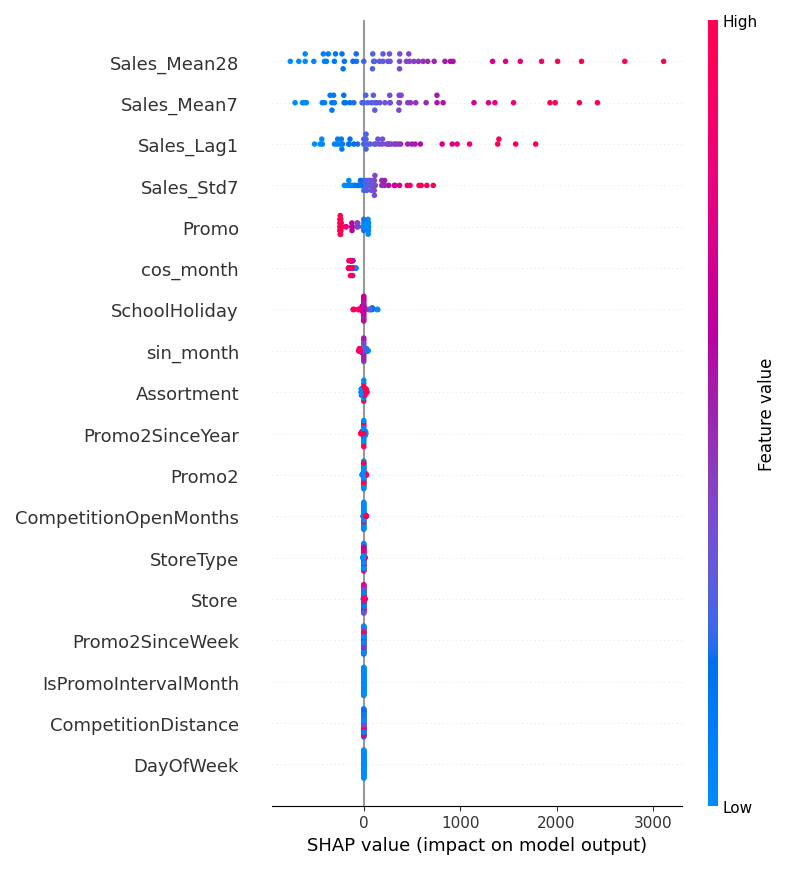

In [135]:
import numpy as np, pandas as pd

sv = np.array(shap_values)  

mean_abs = np.mean(np.abs(sv), axis=0)
fi = pd.Series(mean_abs, index=FEATURES).sort_values(ascending=False)
print(fi.head(20))
from IPython.display import Image
Image(filename='/kaggle/working/models_phase5/shap_summary.png')

Find best hyper parameters for our lstm,Tcm models

In [139]:
def optuna_objective(trial):
    units = trial.suggest_categorical('units', [64,128])
    dropout = trial.suggest_float('dropout', 0.1, 0.3)
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-3)
    m = build_lstm_model(SEQ_LEN, n_features, HORIZON, n_quantiles=len(QUANTILES), units=units, dropout=dropout, lr=lr)
    m.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=multi_quantile_loss_wrapper(QUANTILES))
    history = m.fit(X_train_s, y_train_s, validation_data=(X_val_s, y_val_s), batch_size=512, epochs=6, verbose=0)
    val_loss = min(history.history['val_loss'])
    K.clear_session()
    return val_loss

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
study.optimize(optuna_objective, n_trials=6)
print("Optuna best:", study.best_trial.params)
import joblib
joblib.dump(study, os.path.join(MODEL_DIR, "optuna_study.pkl"))


[I 2026-02-21 17:43:24,340] A new study created in memory with name: no-name-230e3072-f6f3-4998-b55a-08ddeef9fbaf
/tmp/ipykernel_55/574459363.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-3)
[I 2026-02-21 17:45:58,804] Trial 0 finished with value: 0.010437797755002975 and parameters: {'units': 128, 'dropout': 0.24639878836228102, 'lr': 0.00039687933304443713}. Best is trial 0 with value: 0.010437797755002975.
[I 2026-02-21 17:47:51,472] Trial 1 finished with value: 0.010964587330818176 and parameters: {'units': 64, 'dropout': 0.1116167224336399, 'lr': 0.0007348118405270452}. Best is trial 0 with value: 0.010437797755002975.
[I 2026-02-21 17:50:24,822] Trial 2 finished with value: 0.010731698013842106 and parameters: {'units': 128, 'dropout': 0.10411689885916049, 'lr': 0.0009330

Optuna best: {'units': 128, 'dropout': 0.24639878836228102, 'lr': 0.00039687933304443713}


['/kaggle/working/models_phase5/optuna_study.pkl']

**Run this if you want to download a zip of models**

In [141]:
import os
import zipfile

directory_to_zip = '/kaggle/working/models_phase5' 
output_filename = 'rossman_project_backup.zip'

with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zip_ref:
    for root, dirs, files in os.walk(directory_to_zip):
        for file in files:
            file_path = os.path.join(root, file)
            zip_ref.write(file_path, os.path.relpath(file_path, directory_to_zip))

print(f"Successfully created {output_filename}!")

Successfully created rossman_project_backup.zip!
